0.4727938395125177
0.5
0.029012942659282972


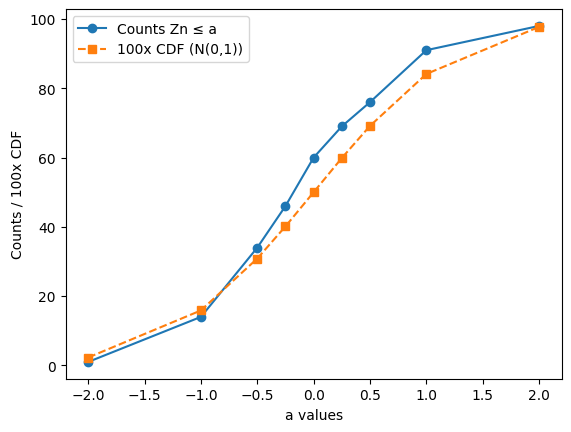

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0)

X_bar_n = np.mean(np.random.uniform(0, 1, 100))
mu_X = 0.5
var_X = 1/12
var_X_bar = np.sqrt(var_X / 99)
print(X_bar_n)
print(mu_X)
print(var_X_bar)

a_vals = [-2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2]
z_vals = []
for _ in range(100):
    sample_mean = np.mean(np.random.uniform(0, 1, 100))
    z_vals.append((sample_mean - mu_X) / np.sqrt(var_X / (99)))

counts = [int((np.array(z_vals) <= a).sum()) for a in a_vals]
cdf = 100 * norm.cdf(a_vals)

plt.plot(a_vals, counts, "o-", label="Counts Zn ≤ a")
plt.plot(a_vals, cdf, "s--", label="100x CDF (N(0,1))")
plt.legend()
plt.xlabel("a values")
plt.ylabel("Counts / 100x CDF")
plt.show()

/var/folders/br/wptzf7w12lxg0_y4zk34szd80000gn/T/ipykernel_55667/994026651.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


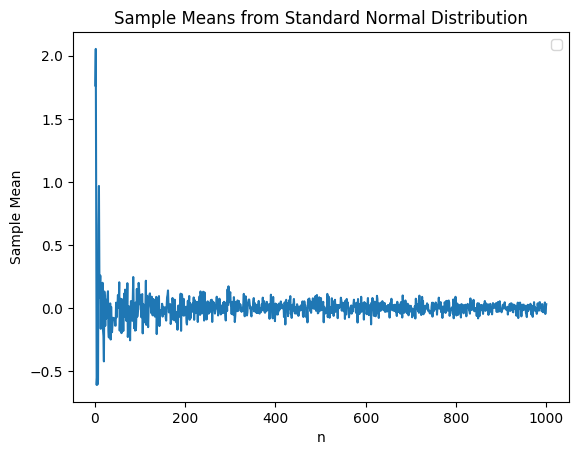

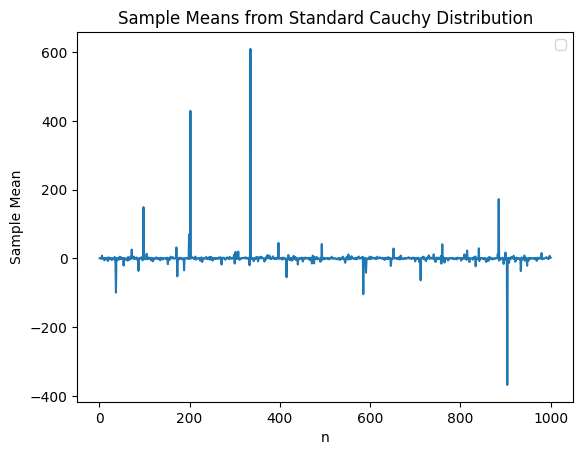

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

Xbars_normal = []
Xbars_cauchy = []
for i in range(1000):
    Xbars_normal.append(np.mean(np.random.standard_normal(size=i + 1)))
    Xbars_cauchy.append(np.mean(np.random.standard_cauchy(size=i + 1)))

def plot(Xbars, title):
    plt.plot(range(1, 1001), Xbars)
    plt.xlabel("n")
    plt.ylabel("Sample Mean")
    plt.title(title)
    plt.legend()
    plt.show()

plot(Xbars_normal, "Sample Means from Standard Normal Distribution")
plot(Xbars_cauchy, "Sample Means from Standard Cauchy Distribution")